#  YOUTUBE CONTENT ANALYSIS FOR CHANNEL OPTIMIZATION

---

### DATA COLLECTION

In [143]:
# Import needed libraries

import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import zipfile
import kaggle 

In [144]:
# Check the dataset from kaggle using the Kaggle API

!kaggle datasets list -s 'Global YouTube Statistics 2023'

ref                                                 title                                  size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023     Global YouTube Statistics 2023         60KB  2023-07-28 15:36:38          34177        807  1.0              
phani038/2023-global-youtube-statistics             2023 Global Youtube Statistics         60KB  2024-01-15 01:16:30             16          0  0.4117647        
ahmadmakhdoomi/global-youtube-statistics-2023       Global YouTube Statistics 2023        180KB  2023-08-27 16:33:45             24          1  0.0              
okonyeolisemeke/eda-global-youtube-statistics-2023  EDA | Global YouTube Statistics 2023  435KB  2023-10-12 23:21:38              7          0  0.25             


In [145]:
# Download programmatically the dataset from Kaggle using the Kaggle API

!kaggle datasets download -d nelgiriyewithana/global-youtube-statistics-2023

global-youtube-statistics-2023.zip: Skipping, found more recently modified local copy (use --force to force download)


In [146]:
# Extract the file from the download zip file

zipfile_name = 'global-youtube-statistics-2023.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [147]:
# Read in the csv file as a pandas dataframe

data = pd.read_csv('youtube_statistics.csv', encoding = 'latin1')

### DATA UNDERSTANDING

In [148]:
# Have a first look at the dataset

data.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [149]:
# Show all the available columns

data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [150]:
# Show the data structure

data.shape

(995, 28)

In [151]:
# Illustrate more info about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

### DATA PREPROCESSING

In [152]:
# Convert column names to lowercase

data.columns = data.columns.str.lower()

# Convert column names to snake_case

data.columns = data.columns.str.replace(' ', '_')

# Convert video views from scientific notation to regular notation

data['video_views'] = data['video_views'].apply(lambda x: '{:.0f}'.format(x))

# Rename the 'Gross tertiary education enrollment (%)' column

data = data.rename(columns={'gross_tertiary_education_enrollment_(%)': 'education_enrollment'})

# Convert 'video_views' to numeric

data['video_views'] = pd.to_numeric(data['video_views'], errors='coerce')

In [153]:
# Check data type

data.dtypes

rank                                  int64
youtuber                             object
subscribers                           int64
video_views                           int64
category                             object
title                                object
uploads                               int64
country                              object
abbreviation                         object
channel_type                         object
video_views_rank                    float64
country_rank                        float64
channel_type_rank                   float64
video_views_for_the_last_30_days    float64
lowest_monthly_earnings             float64
highest_monthly_earnings            float64
lowest_yearly_earnings              float64
highest_yearly_earnings             float64
subscribers_for_last_30_days        float64
created_year                        float64
created_month                        object
created_date                        float64
education_enrollment            

In [154]:
# Check for N/A values

data.isna().sum()

rank                                  0
youtuber                              0
subscribers                           0
video_views                           0
category                             46
title                                 0
uploads                               0
country                             122
abbreviation                        122
channel_type                         30
video_views_rank                      1
country_rank                        116
channel_type_rank                    33
video_views_for_the_last_30_days     56
lowest_monthly_earnings               0
highest_monthly_earnings              0
lowest_yearly_earnings                0
highest_yearly_earnings               0
subscribers_for_last_30_days        337
created_year                          5
created_month                         5
created_date                          5
education_enrollment                123
population                          123
unemployment_rate                   123


In [155]:
# Drop N/A values

data = data.dropna()
data.isna().sum()

rank                                0
youtuber                            0
subscribers                         0
video_views                         0
category                            0
title                               0
uploads                             0
country                             0
abbreviation                        0
channel_type                        0
video_views_rank                    0
country_rank                        0
channel_type_rank                   0
video_views_for_the_last_30_days    0
lowest_monthly_earnings             0
highest_monthly_earnings            0
lowest_yearly_earnings              0
highest_yearly_earnings             0
subscribers_for_last_30_days        0
created_year                        0
created_month                       0
created_date                        0
education_enrollment                0
population                          0
unemployment_rate                   0
urban_population                    0
latitude    

In [156]:
# Check for unique value in the dataset 

data.nunique()

rank                                554
youtuber                            554
subscribers                         239
video_views                         554
category                             17
title                               552
uploads                             507
country                              42
abbreviation                         42
channel_type                         14
video_views_rank                    552
country_rank                        180
channel_type_rank                   187
video_views_for_the_last_30_days    552
lowest_monthly_earnings             428
highest_monthly_earnings            442
lowest_yearly_earnings              472
highest_yearly_earnings             259
subscribers_for_last_30_days         37
created_year                         19
created_month                        12
created_date                         31
education_enrollment                 42
population                           42
unemployment_rate                    41


In [157]:
# Show the 10 first rows in the dataset

pd.set_option('display.max_columns', None)
data.head(10)

,rank,youtuber,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,education_enrollment,population,unemployment_rate,urban_population,latitude,longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,106000000,90479060027,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,630.0,5.0,25.0,4.894700e+07,12200.0,195800.0,146800.0,2300000.0,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,77180169894,Entertainment,Vlad and Niki,574,United States,US,Entertainment,8.0,5.0,6.0,5.805740e+08,145100.0,2300000.0,1700000.0,27900000.0,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
10,11,Zee Music Company,96700000,57856289381,Music,Zee Music Company,8548,India,IN,Music,12.0,3.0,2.0,8.036130e+08,200900.0,3200000.0,2400000.0,38600000.0,1100000.0,2014.0,Mar,12.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
11,12,WWE,96000000,77428473662,Sports,WWE,70127,United States,US,Sports,7.0,6.0,1.0,7.146140e+08,178700.0,2900000.0,2100000.0,34300000.0,600000.0,2007.0,May,11.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
13,14,BLACKPINK,89800000,32144597566,People & Blogs,BLACKPINK,543,South Korea,KR,Music,32.0,1.0,3.0,4.989300e+08,124700.0,2000000.0,1500000.0,23900000.0,700000.0,2016.0,Jun,29.0,94.3,5.170910e+07,4.15,42106719.0,35.907757,127.766922
15,16,Sony SAB,83000000,101000000000,Shows,Sony SAB,71270,India,IN,Entertainment,4.0,5.0,7.0,1.657000e+09,414300.0,6600000.0,5000000.0,79600000.0,1100000.0,2007.0,Aug,4.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


The "channel_type" column does not match the values specified in the dataset description, which is supposed to represent the type of YouTube channel (e.g., individual, brand). Therefore, we will drop that column to streamline our future analysis.

In [158]:
# Drop channel_type

data = data.drop(columns=['channel_type'])
data.head(3)

,rank,youtuber,subscribers,video_views,category,title,uploads,country,abbreviation,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,education_enrollment,population,unemployment_rate,urban_population,latitude,longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


### DATA ANALYSIS

<strong>Question 1:</strong> What are the most popular topics on Youtube in 2023? <br>
<strong>Hypothesis:</strong> Youtube covers many topics, but due to its popularity in the social network sphere, the top three most popular topics on Youtube are likely <em>Entertainment, News, and Education.</em>  

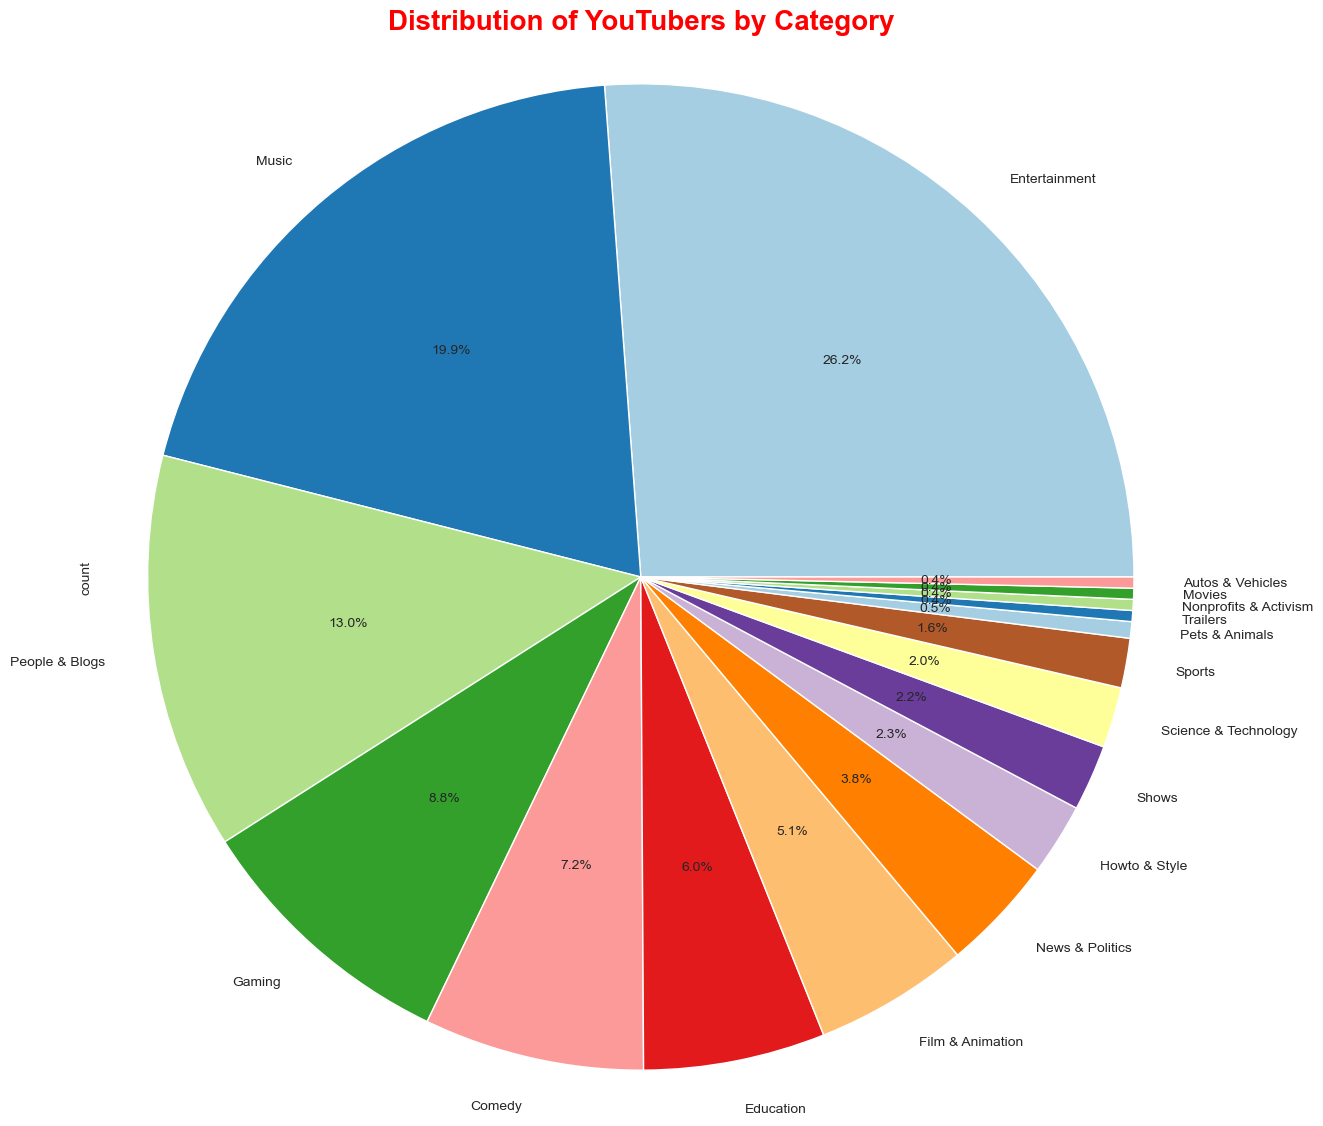

In [159]:
# Check the distribution of Youtubers by category

youtubers_distribution_by_category = data['category'].value_counts()
plt.figure(figsize=(14,14))
youtubers_distribution_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=plt.cm.Paired.colors)

# Create a pie chart

plt.title('Distribution of YouTubers by Category',fontweight = 'heavy', color='red',size=20)
plt.axis('equal')  

plt.show()

In [160]:
# Profil content creators by category

category_profile = data.groupby('category')['subscribers'].sum().reset_index()
category_profile = category_profile.sort_values(by = 'subscribers', ascending = False)

print("Top Content Categories by Subscribers:")
print(category_profile.head())

Top Content Categories by Subscribers:
          category  subscribers
3    Entertainment   3371300000
8            Music   3227100000
11  People & Blogs   1621000000
2        Education    987800000
5           Gaming    973800000


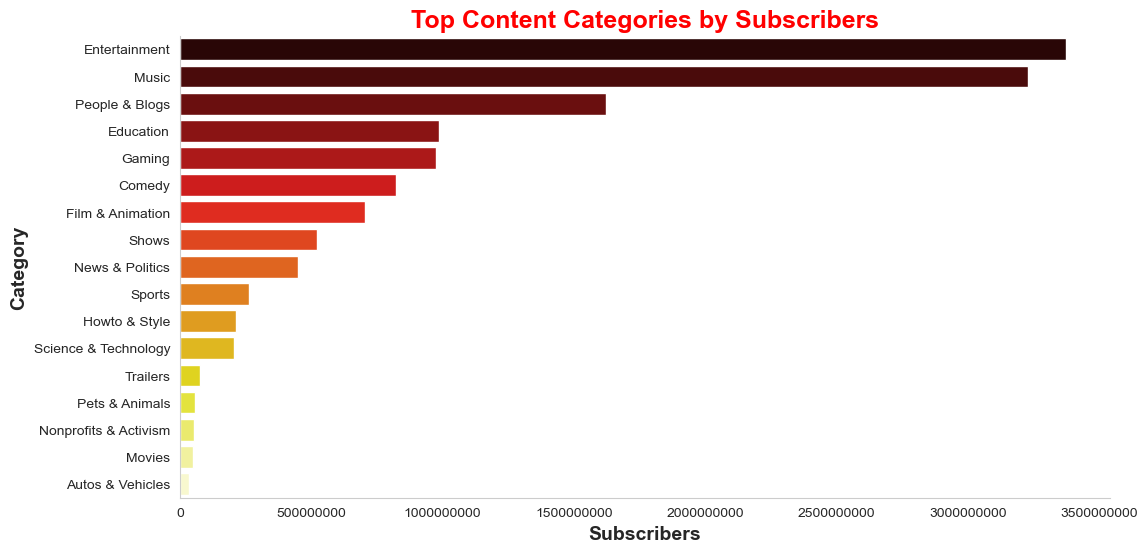

In [161]:
# Plot the top content categories by subscribers

plt.figure(figsize=(12, 6))
sns.barplot(x='subscribers', y='category', data=category_profile, hue = 'category', palette='hot', legend = False)
plt.title('Top Content Categories by Subscribers', fontweight = 'heavy', color = 'red', size = 18)
plt.xlabel('Subscribers', fontweight = 'heavy', size = 14)
plt.ylabel('Category', fontweight = 'heavy', size = 14)
plt.ticklabel_format(style='plain', axis='x')
sns.despine(left = False, bottom = False)

plt.show()

---

<strong>Question 2:</strong> How does the number of uploaded videos impact channel growth? <br>
<strong>Hypothesis:</strong> The more videos you upload on the platform, the more YouTube's algorithm considers you as an active member and suggests your channel more frequently to a larger audience. </em>  

In [162]:
# Sort the DataFrame by the 'uploads' column and display the top 10 Youtubers 

top_10_youtubers_by_uploads = data[['youtuber', 'uploads']].sort_values(by = 'uploads', ascending = False).head(10)

top_10_youtubers_by_uploads

,youtuber,uploads
95,ABP NEWS,301308
857,GMA Integrated News,296272
747,TV9 Bharatvarsh,293516
33,Aaj Tak,283775
107,IndiaTV,273255
689,KOMPASTV,269050
586,Thairath Online,244899
502,News 24,211620
673,ABS-CBN News,209520
84,TEDx Talks,200933


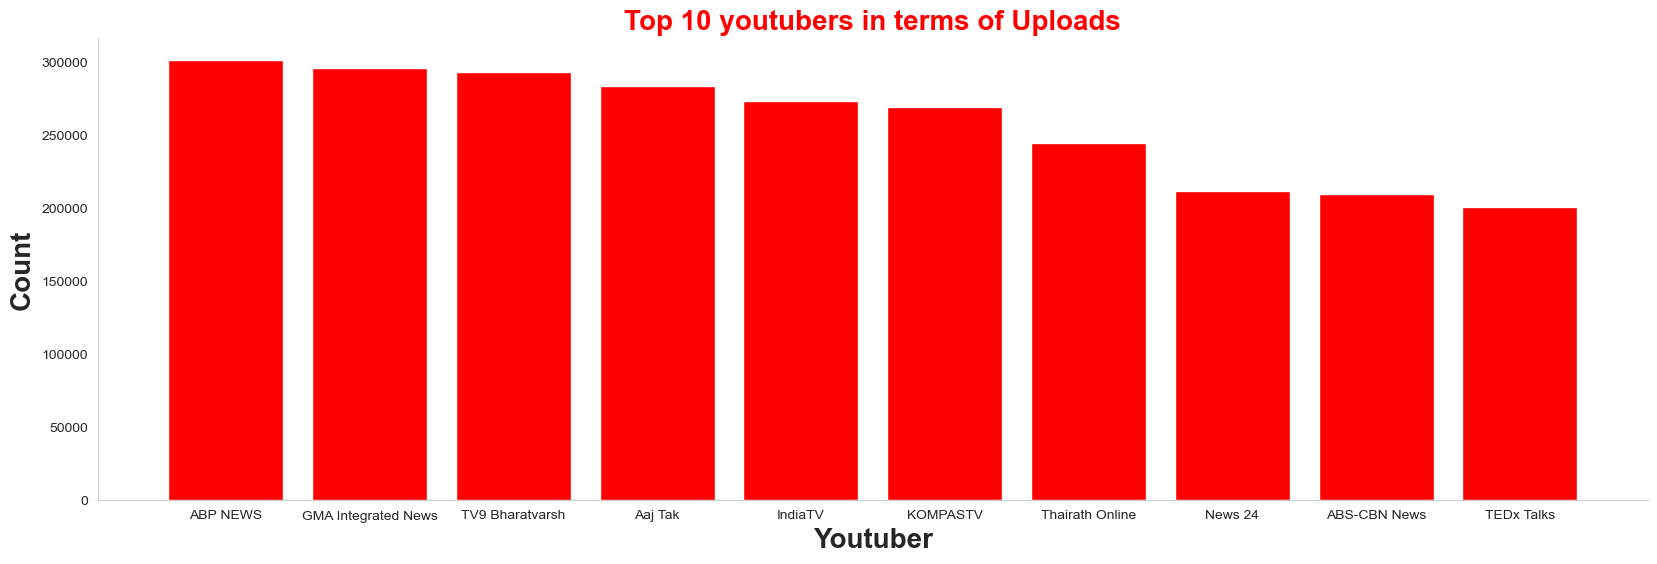

In [163]:
# Plot the top 10 Youtubers in terms of uploads

plt.figure(figsize = (20,6))
plt.bar(top_10_youtubers_by_uploads['youtuber'], top_10_youtubers_by_uploads['uploads'], color = 'red')
plt.xlabel('Youtuber', fontweight = 'heavy', size = 20)
plt.ylabel('Count', fontweight = 'heavy', size = 20)
plt.title('Top 10 youtubers in terms of Uploads', fontweight = 'heavy', color = 'red', size = 20)
sns.despine(left = False, bottom = False)

plt.show()

In [164]:
# Sort the DataFrame by the 'view_views' column and display the top 10 Youtubers 

top_10_youtubers_by_views = data[['youtuber', 'video_views']].sort_values(by = 'video_views', ascending = False).head(10)

top_10_youtubers_by_views

,youtuber,video_views
0,T-Series,228000000000
3,Cocomelon - Nursery Rhymes,164000000000
4,SET India,148000000000
15,Sony SAB,101000000000
8,Like Nastya,90479060027
11,WWE,77428473662
9,Vlad and Niki,77180169894
21,Zee TV,73139054467
26,Colors TV,61510906457
29,Movieclips,59316472754


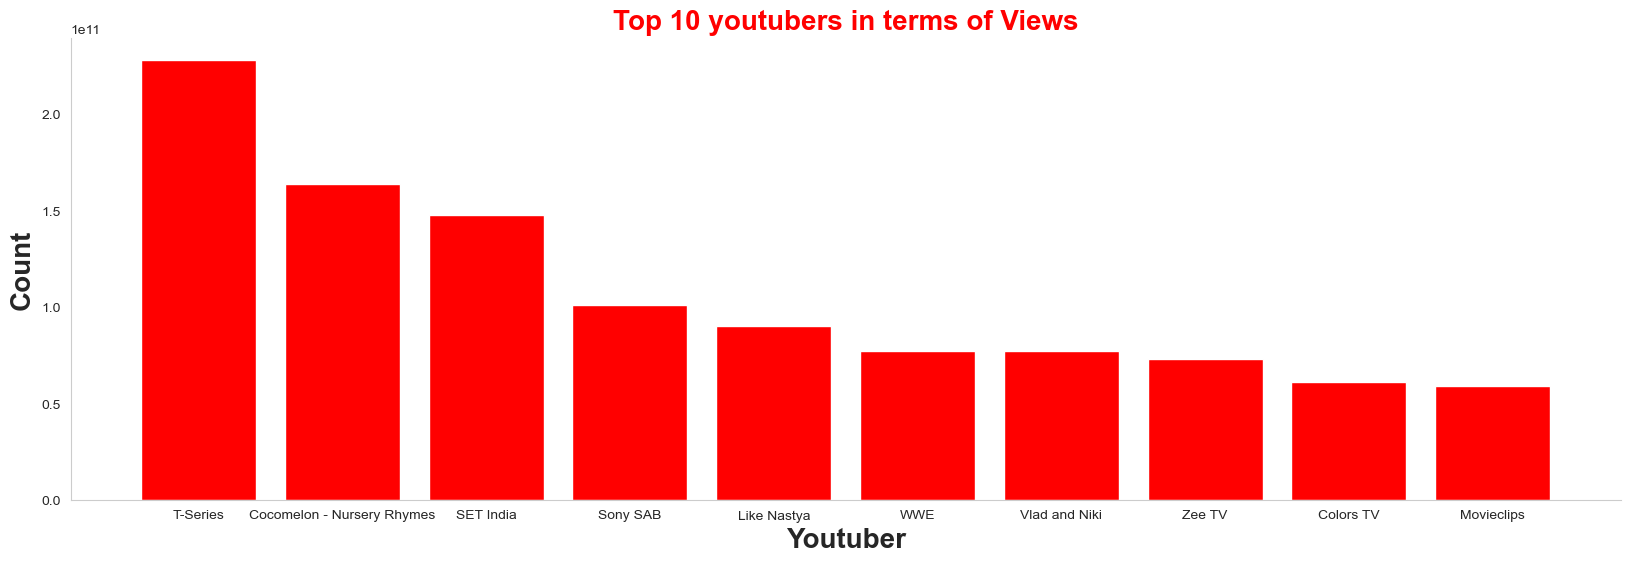

In [165]:
# Plot the top 10 Youtubers in terms of views

plt.figure(figsize = (20,6))
plt.bar(top_10_youtubers_by_views['youtuber'], top_10_youtubers_by_views['video_views'], color = 'red')
plt.xlabel('Youtuber', fontweight = 'heavy', size = 20)
plt.ylabel('Count', fontweight = 'heavy', size = 20)
plt.title('Top 10 youtubers in terms of Views', fontweight = 'heavy', color = 'red', size = 20)
sns.despine(left = False, bottom = False)

plt.show()

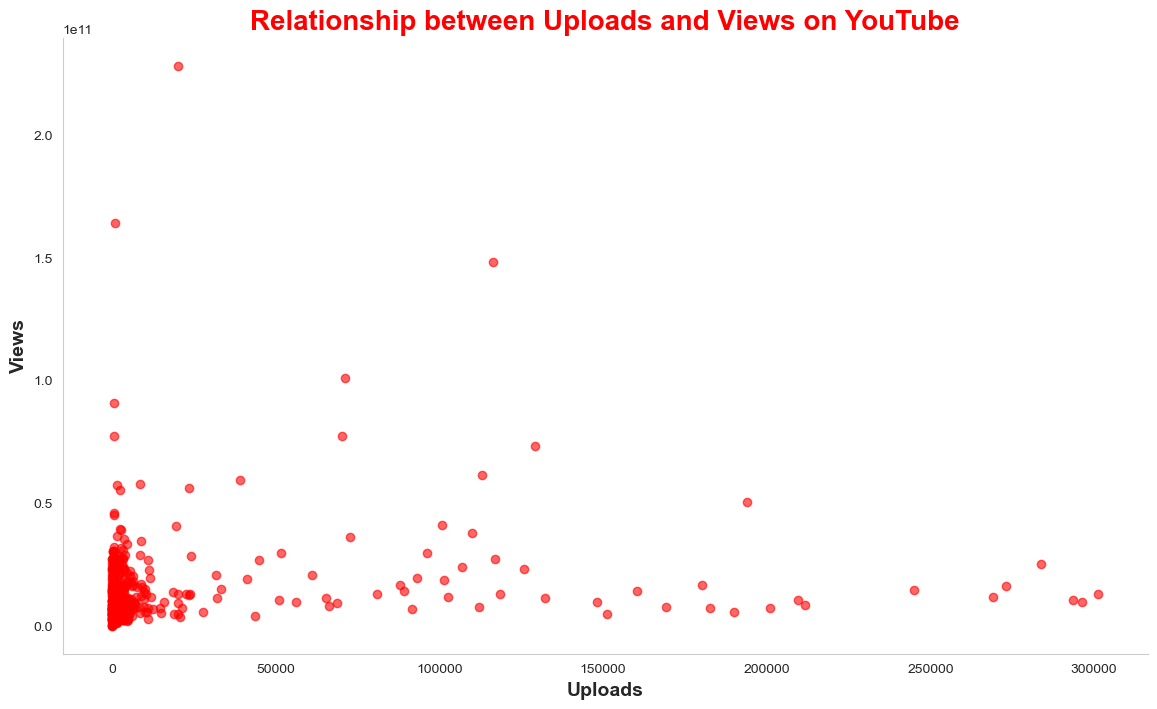

In [166]:
# Check the relationship between the number of video upload and number of views

plt.figure(figsize = (14, 8))
plt.scatter(data['uploads'], data['video_views'], color = 'red', alpha = 0.6)
plt.title('Relationship between Uploads and Views on YouTube', fontweight = 'heavy', color = 'red', size = 20)
plt.xlabel('Uploads', fontweight = 'heavy', size = 14)
plt.ylabel('Views', fontweight = 'heavy', size = 14)
sns.despine(left = False, bottom = False)
plt.grid(axis = 'y', linestyle = '')

plt.show()

In [167]:
# Sort the DataFrame by the 'subscribers' column and display the top 10 Youtubers 

top_10_youtubers_by_subscribers = data[['youtuber', 'subscribers']].sort_values(by = 'subscribers', ascending = False).head(10)

top_10_youtubers_by_subscribers

,youtuber,subscribers
0,T-Series,245000000
2,MrBeast,166000000
3,Cocomelon - Nursery Rhymes,162000000
4,SET India,159000000
8,Like Nastya,106000000
9,Vlad and Niki,98900000
10,Zee Music Company,96700000
11,WWE,96000000
13,BLACKPINK,89800000
15,Sony SAB,83000000


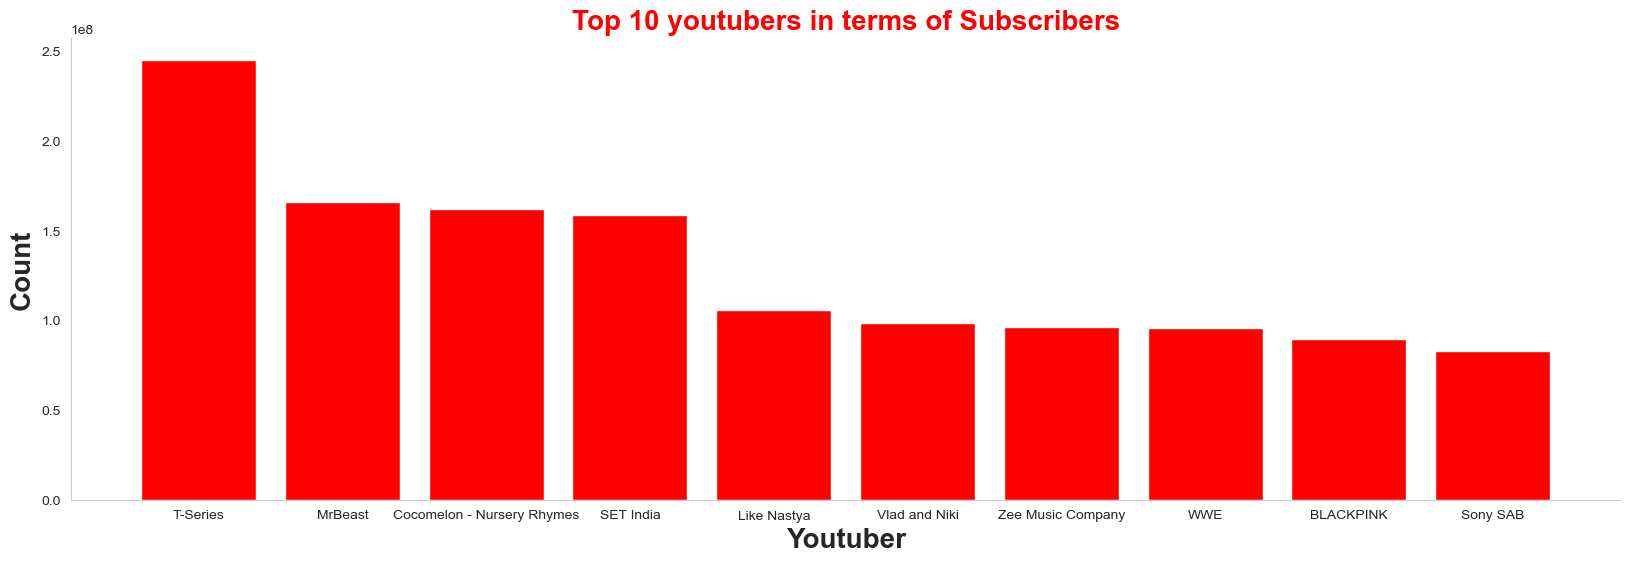

In [168]:
# Plot the top 10 Youtubers in terms of suscribers

plt.figure(figsize = (20,6))
plt.bar(top_10_youtubers_by_subscribers['youtuber'], top_10_youtubers_by_subscribers['subscribers'], color = 'red')
plt.xlabel('Youtuber', fontweight = 'heavy', size = 20)
plt.ylabel('Count', fontweight = 'heavy', size = 20)
plt.title('Top 10 youtubers in terms of Subscribers', fontweight = 'heavy', color = 'red', size = 20)
sns.despine(left = False, bottom = False)

plt.show()

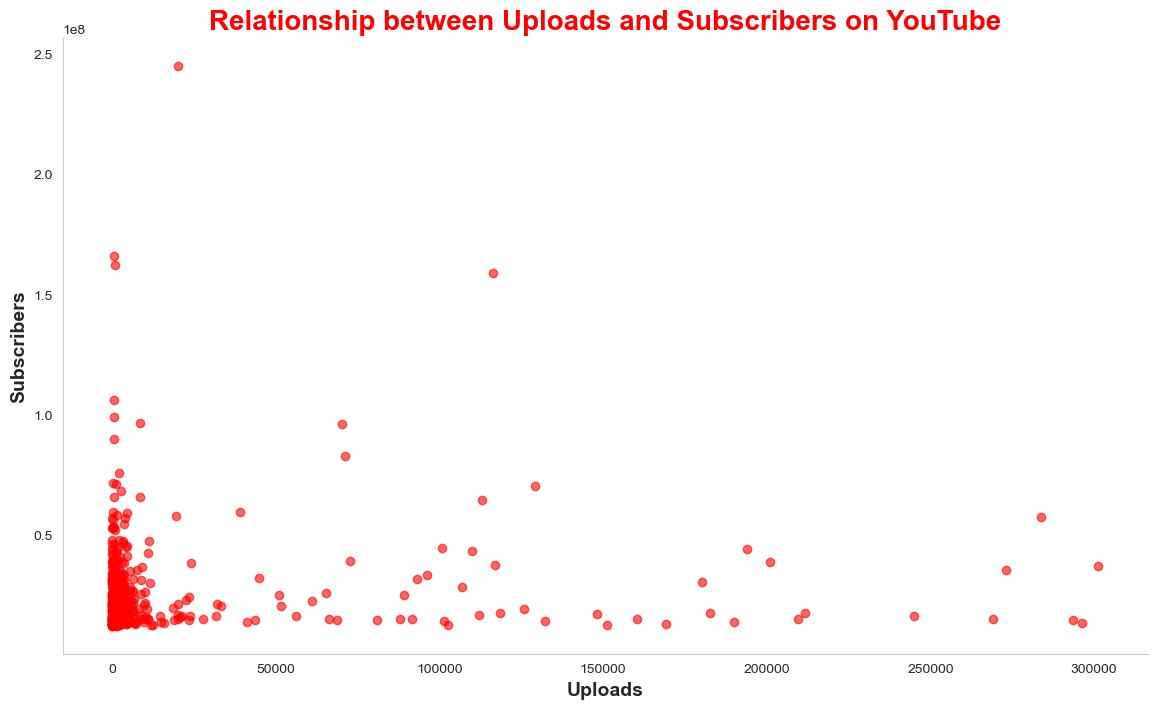

In [169]:
# Check the relationship between the number of video upload and number of subscribers

plt.figure(figsize = (14, 8))
plt.scatter(data['uploads'], data['subscribers'], color = 'red', alpha = 0.6)
plt.title('Relationship between Uploads and Subscribers on YouTube', fontweight = 'heavy', color = 'red', size = 20)
plt.xlabel('Uploads', fontweight = 'heavy', size = 14)
plt.ylabel('Subscribers', fontweight = 'heavy', size = 14)
sns.despine(left = False, bottom = False)
plt.grid(axis = 'y', linestyle = '')

plt.show()

---

<strong>Question 3:</strong> How does content diversity affect channel performance?<br>
<strong>Hypothesis:</strong> Diversity is useful for covering a range of topics, but on YouTube, it's often better to focus on one niche and make a significant impact in that domain.</em>  

In [170]:
# Convert the subscribers value to milliom

data['subscribers_million'] = data['subscribers']/1000000

# Filter the dataset

data_category = data.dropna(subset = ['category'])

In [171]:
# Calculate median category

category_medians = data_category.groupby('category')['subscribers'].median()
median_order = category_medians.sort_values(ascending = False).index

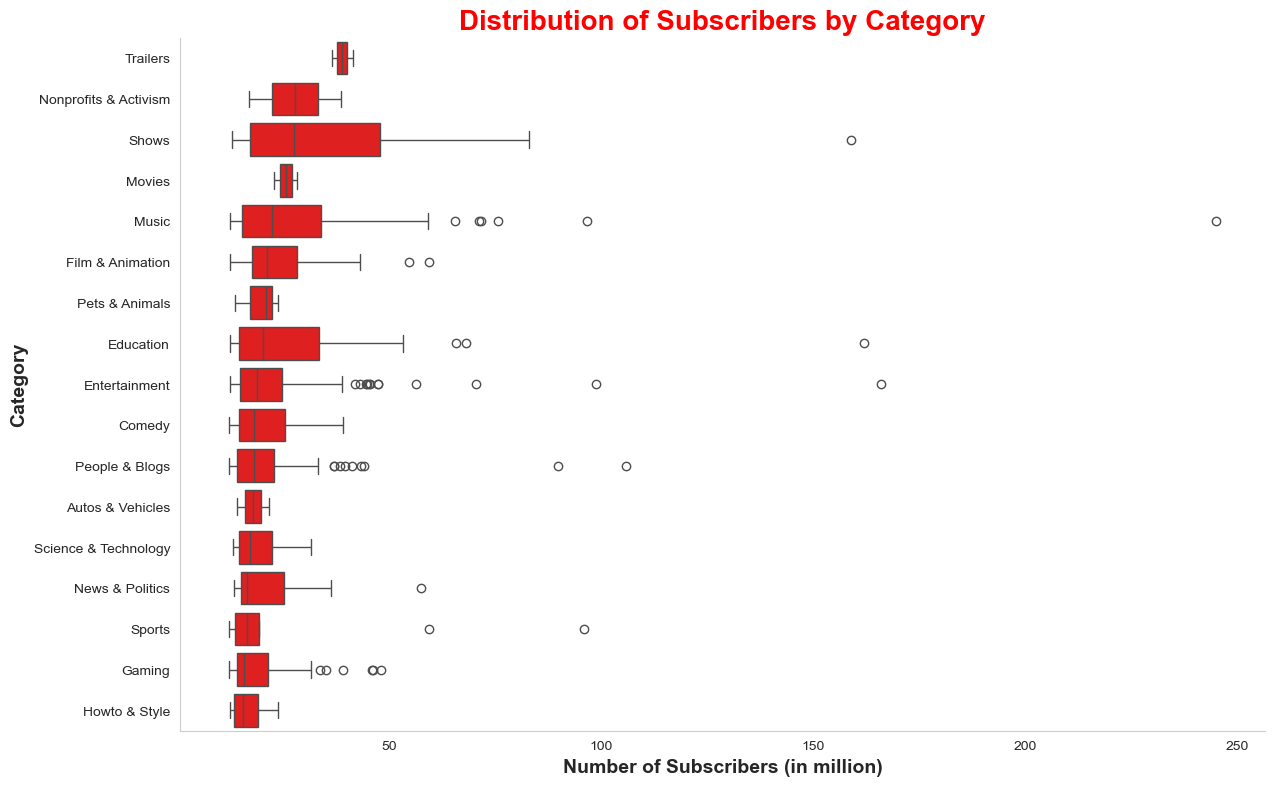

In [172]:
# Plot the distribution of subscribers by category

fig, ax = plt.subplots(figsize=(14, 9))
g = sns.boxplot(data = data_category,
                x = 'subscribers_million',
                y = 'category',
                order = median_order,
                color = 'red',
                fill = 'grey'
                )
ax.set_title('Distribution of Subscribers by Category', fontweight = 'heavy', color = 'red', size = 20)
ax.set_xlabel('Number of Subscribers (in million)', fontweight = 'heavy', size = 14)
ax.set_ylabel('Category', fontweight = 'heavy', size = 14)
sns.despine(left = False, bottom = False)

plt.show()

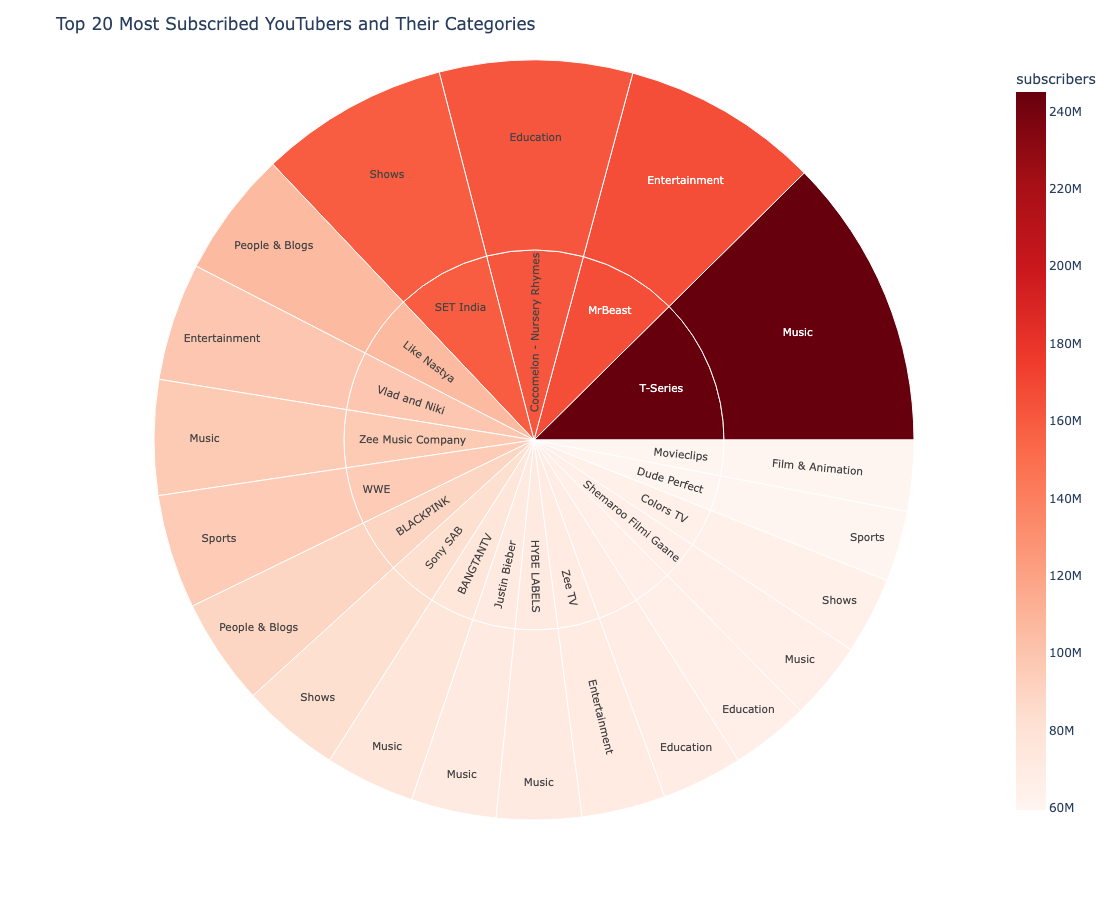

In [173]:
# Visualize top 20 most subscribed Youtubers and their category

top20_most_subscribed_channels = data[:20]
fig = px.sunburst(
    top20_most_subscribed_channels,
    path = ['youtuber', 'category'],
    values = 'subscribers',
    color = 'subscribers',
    color_continuous_scale = 'Reds'
)
fig.update_layout(
    title_text = 'Top 20 Most Subscribed YouTubers and Their Categories', 
    uniformtext = dict(minsize = 8, mode = 'hide'),
    width = 1100,
    height = 900)

fig.show()

--- 

<strong>Question 4:</strong> What are the demographics of Youtube audiences?<br>
<strong>Hypothesis:</strong> The United States has the largest audience on YouTube. Therefore, content creators and brands can adjust their content creation strategies to align with the United States' YouTube content models, including trends and using English as the primary language, to access a larger viewer base.</em>  

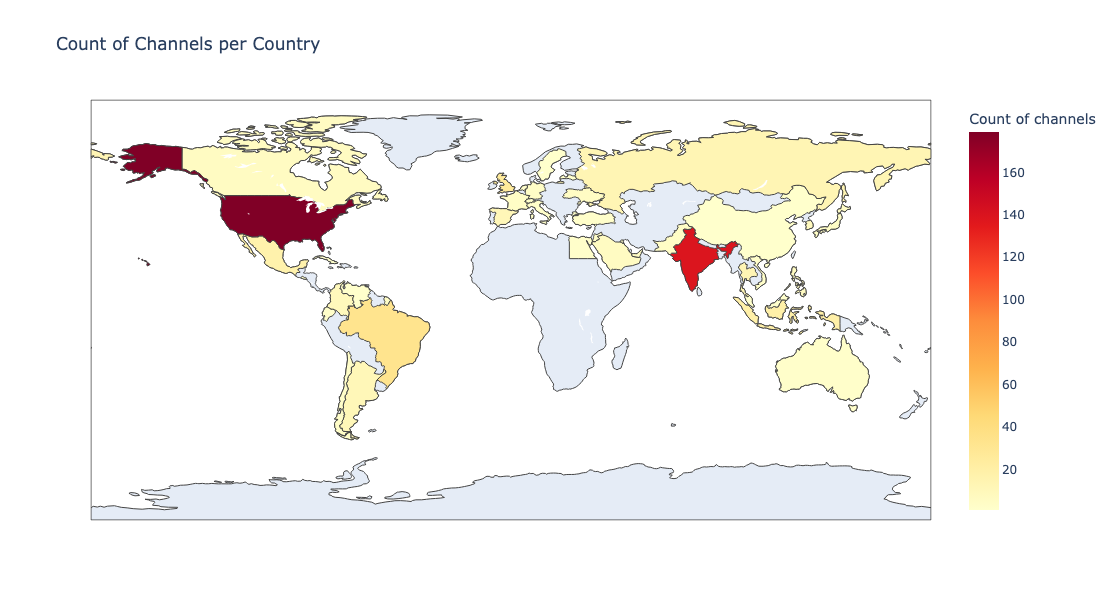

In [174]:
# Filter dataset 

data_country = data.dropna(subset = ['country'])

# Visualize count of channels per country

data_geo_count = data_country.groupby('country')['subscribers_million'].count().reset_index()
data_geo_count = data_geo_count.rename(columns = {'subscribers_million': "Count of channels"})
px.choropleth(data_geo_count, 
                    locations = "country", 
                    locationmode = 'country names', 
                    color = 'Count of channels', 
                    color_continuous_scale = px.colors.sequential.YlOrRd,
                    width = 1100,
                    height = 600,
                    title = "Count of Channels per Country"
             )

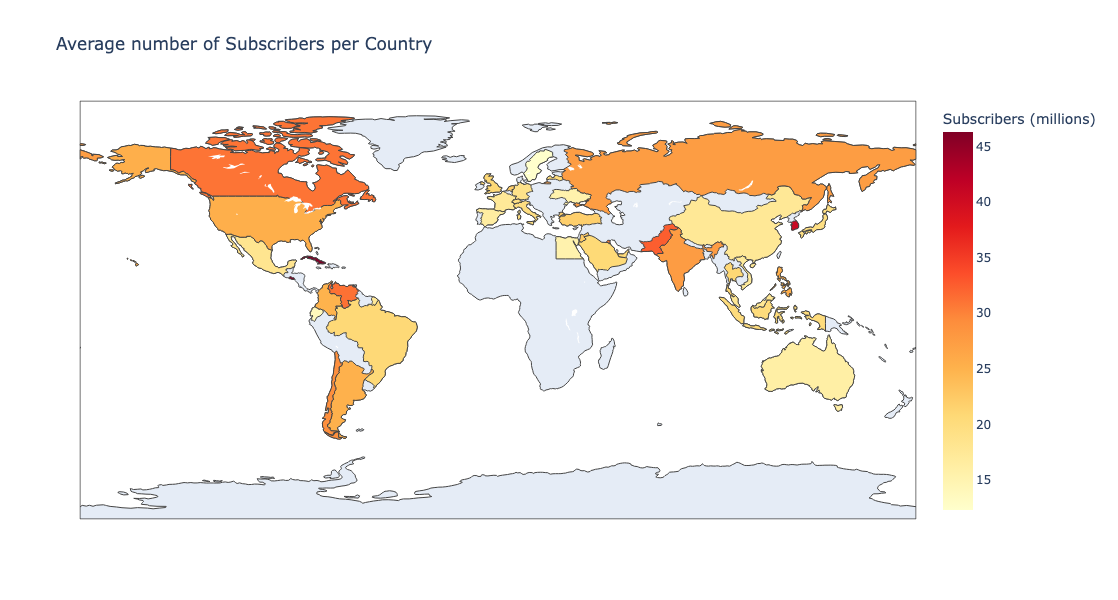

In [175]:
# Visualize the average number of Subscribers per country

data_geo_subscribers = data_country.groupby('country')['subscribers_million'].mean().reset_index()
data_geo_subscribers = data_geo_subscribers.rename(columns = {'subscribers_million': "Subscribers (millions)"})
px.choropleth(data_geo_subscribers, 
                    locations = "country", 
                    locationmode = 'country names', 
                    color = 'Subscribers (millions)', 
                    color_continuous_scale = px.colors.sequential.YlOrRd,
                    width = 1100,
                    height = 600,
                    title = "Average number of Subscribers per Country"
             )

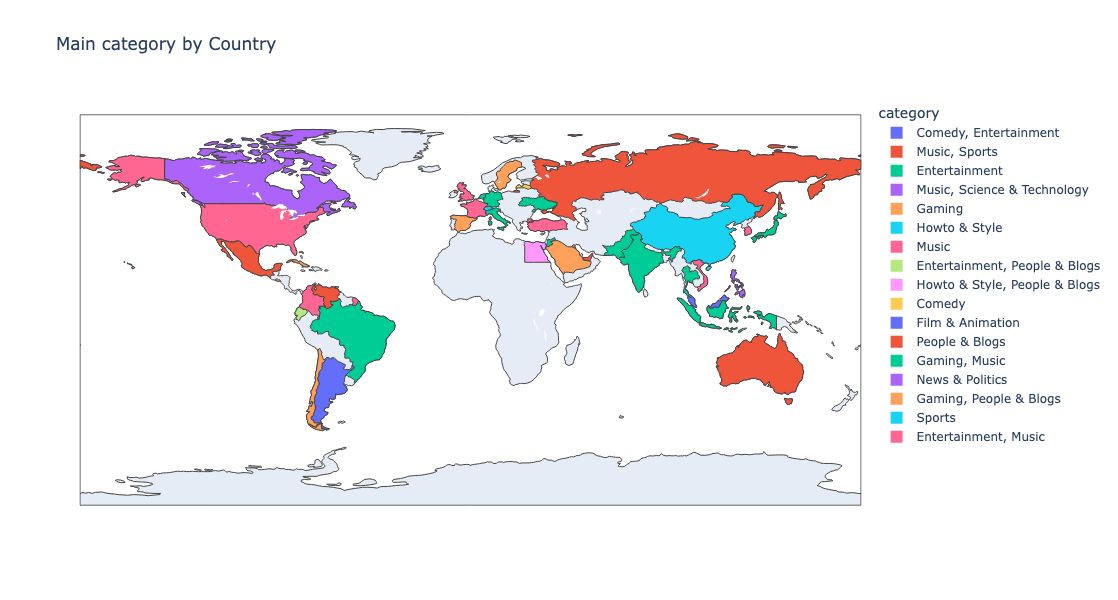

In [176]:
# Visualize channel category by Country

def scalarize(row):
    if type(row) == np.ndarray:
        return ", ".join([str(x) for x in row])
    else:
        return row

data_geo_category = data.groupby('country')['category'].agg(pd.Series.mode).reset_index()
data_geo_category['category'] = data_geo_category['category'].apply(scalarize)
px.choropleth(data_geo_category, 
                    locations = "country", 
                    locationmode = 'country names', 
                    color = 'category', 
                    width = 1100,
                    height = 600,
                    title = "Main category by Country"
             )

---

<strong>Question 5:</strong> Is there a correlation between the number of subscribers, views and remuneration from YouTube?<br>
<strong>Hypothesis:</strong> Yes, the more subscribers and views you have, the higher the remuneration from the channel.</em>  

In [177]:
# Check the statistic table of correlation

correlation = data[['subscribers', 'video_views', 'uploads', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'population', 'created_year']].corr()
correlation

,subscribers,video_views,uploads,lowest_monthly_earnings,highest_monthly_earnings,population,created_year
subscribers,1.000000,0.850776,0.074791,0.534713,0.534388,0.092695,-0.176204
video_views,0.850776,1.000000,0.147477,0.637991,0.637376,0.077511,-0.159777
uploads,0.074791,0.147477,1.000000,0.155557,0.156062,0.129280,-0.185945
lowest_monthly_earnings,0.534713,0.637991,0.155557,1.000000,0.999937,0.103193,0.041387
highest_monthly_earnings,0.534388,0.637376,0.156062,0.999937,1.000000,0.103213,0.041437
population,0.092695,0.077511,0.129280,0.103193,0.103213,1.000000,0.087376
created_year,-0.176204,-0.159777,-0.185945,0.041387,0.041437,0.087376,1.000000


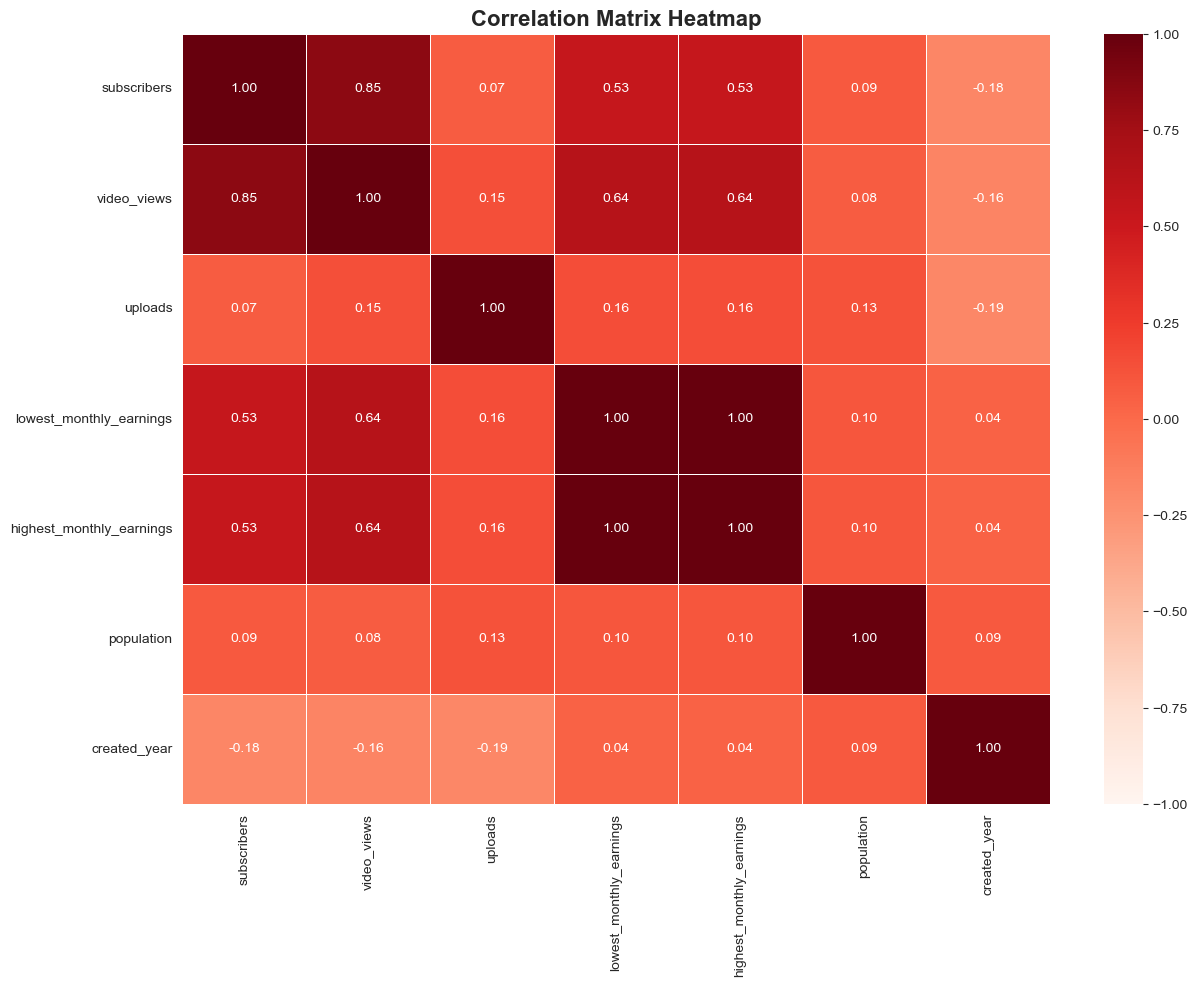

In [178]:
# Visualize the correlation on a heatmap

plt.figure(figsize = (14,10))
plt.title('Correlation Matrix Heatmap', fontweight = 'heavy', fontsize = 16)
sns.heatmap(correlation, annot = True,
           cmap = 'Reds',
           vmin = -1, vmax = 1,
           linecolor = 'white', linewidths = 0.5,
           fmt = '.2f'
           )

plt.show()

In [179]:
# Check the average earning per number of views

views_earnings = data[['youtuber', 'video_views', 'lowest_monthly_earnings', 'highest_monthly_earnings']].copy()

views_earnings['average_monthly_earnings'] = (views_earnings['lowest_monthly_earnings'] + views_earnings['highest_monthly_earnings'])/2

views_earnings['average_monthly_earnings_(1000$)'] = (views_earnings['average_monthly_earnings'] /1000).astype('int')

views_earnings['video_views_(billion)'] = (views_earnings['video_views'] /1000000000).astype('int')

views_earnings = views_earnings[['youtuber', 'video_views_(billion)', 'average_monthly_earnings_(1000$)']].copy()

views_earnings.head(10)

,youtuber,video_views_(billion),average_monthly_earnings_(1000$)
0,T-Series,228,4782
2,MrBeast,28,2868
3,Cocomelon - Nursery Rhymes,164,4196
4,SET India,148,3877
8,Like Nastya,90,104
9,Vlad and Niki,77,1222
10,Zee Music Company,57,1700
11,WWE,77,1539
13,BLACKPINK,32,1062
15,Sony SAB,101,3507


In [180]:
# Calculate the correlation coefficient

correlation = views_earnings['average_monthly_earnings_(1000$)'].corr(views_earnings['video_views_(billion)'])

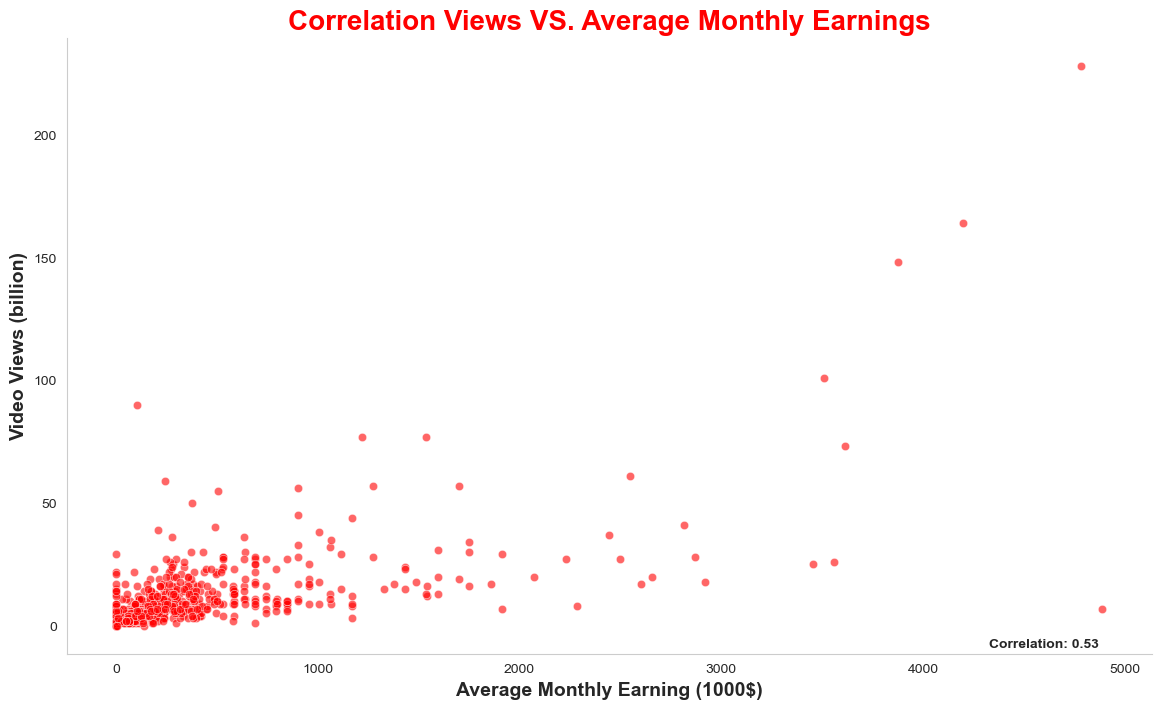

In [190]:
# Plot views vs. average monthly earnings

sns.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize=(14,8))
sns.scatterplot(data = views_earnings, x = 'average_monthly_earnings_(1000$)', y = 'video_views_(billion)', color = 'red', alpha = 0.6)
plt.title('Correlation Views VS. Average Monthly Earnings', fontweight = 'heavy', size = 20, color = 'red')
plt.xlabel('Average Monthly Earning (1000$)', fontsize = 14, fontweight = 'heavy')
plt.ylabel('Video Views (billion)', fontsize = 14, fontweight = 'heavy')

sns.despine(left=False, bottom=False)
plt.grid(axis = 'y', linestyle ='')
# Note correlation
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy = (0.85, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10, 
             weight = 'bold')

plt.show()

In [186]:
# Check the average earning per number of subscribers

num_sub_earnings = data[['youtuber', 'subscribers', 'lowest_monthly_earnings', 'highest_monthly_earnings']].copy()

num_sub_earnings['average_monthly_earnings'] = (num_sub_earnings['lowest_monthly_earnings'] + num_sub_earnings['highest_monthly_earnings'])/2

num_sub_earnings['average_monthly_earnings_(1000$)'] = (num_sub_earnings['average_monthly_earnings'] /1000).astype('int')

num_sub_earnings = num_sub_earnings[['youtuber', 'subscribers', 'average_monthly_earnings_(1000$)']].copy()

num_sub_earnings.head(10)

,youtuber,subscribers,average_monthly_earnings_(1000$)
0,T-Series,245000000,4782
2,MrBeast,166000000,2868
3,Cocomelon - Nursery Rhymes,162000000,4196
4,SET India,159000000,3877
8,Like Nastya,106000000,104
9,Vlad and Niki,98900000,1222
10,Zee Music Company,96700000,1700
11,WWE,96000000,1539
13,BLACKPINK,89800000,1062
15,Sony SAB,83000000,3507


In [187]:
# Calculate the correlation coefficient

correlation = num_sub_earnings['average_monthly_earnings_(1000$)'].corr(num_sub_earnings['subscribers'])

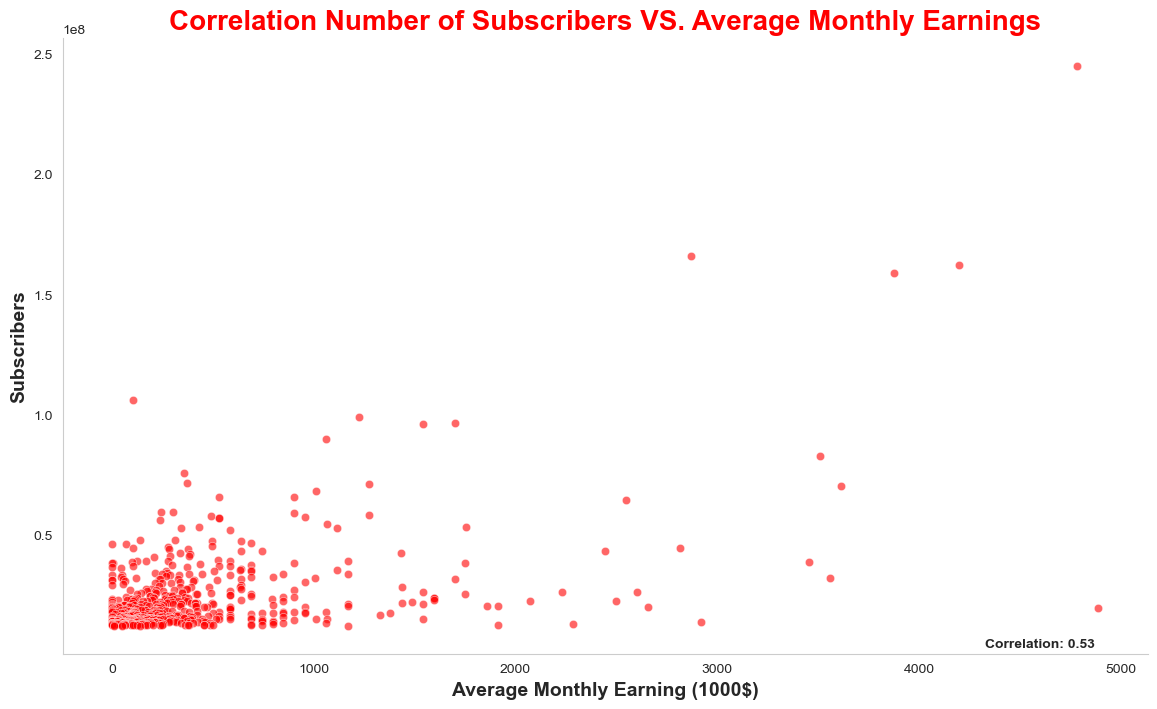

In [191]:
# Plot subscribers vs. average monthly earnings

sns.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize=(14,8))
sns.scatterplot(data = num_sub_earnings, x = 'average_monthly_earnings_(1000$)', y = 'subscribers', color = 'red', alpha = 0.6)
plt.title('Correlation Number of Subscribers VS. Average Monthly Earnings', fontweight = 'heavy', size = 20, color = 'red')
plt.xlabel('Average Monthly Earning (1000$)', fontsize = 14, fontweight = 'heavy')
plt.ylabel('Subscribers', fontsize = 14, fontweight = 'heavy')

sns.despine(left=False, bottom=False)
plt.grid(axis = 'y', linestyle ='')
# Note correlation
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy = (0.85, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10, 
             weight = 'bold')

plt.show()

See the whole project at:<br> 

https://github.com/herizoja/Youtube_content_analysis_for_channel_optimization <br>

***Thanks for watching*** ;)